# Cuaderno Para la Prueba == Alumno: Hernan Leon

▪	Generar un modelo matematico de prediccion, de los nuevos contactos en la proxima semana (7 dias despues).

**Importacion de librerias y recuperacion de Datos**

Datos recuperados

16/3/2020       37
17/3/2020       81
18/3/2020      128
19/3/2020      187
20/3/2020      318
21/3/2020      397
22/3/2020      607
23/3/2020      769
24/3/2020      826
25/3/2020      885
26/3/2020     1021
27/3/2020     1202
28/3/2020     1345
29/3/2020     1377
30/3/2020     1397
31/3/2020     1615
1/4/2020      1941
2/4/2020      2243
3/4/2020      2388
4/4/2020      2402
5/4/2020      2524
6/4/2020      2534
7/4/2020      2706
8/4/2020      3047
9/4/2020      3384
10/4/2020     5281
11/4/2020     5290
12/4/2020     5381
13/4/2020     5395
14/4/2020     5417
15/4/2020     5551
16/4/2020     5754
17/4/2020     5777
18/4/2020     6150
19/4/2020     6446
20/4/2020     6921
21/04/2020    7108
22/04/2020    7391
Name: 9, dtype: object


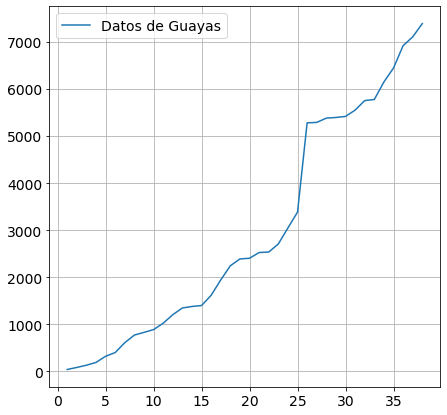

In [28]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
from time import time
from scipy.integrate import odeint
from random import randrange # Obtener un numero randomico
import pygame

plotlin = plt
plotlog = plt
plotexp = plt
plotpol = plt
plotsir = plt
start_date = "16/3/2020"
url = 'Casos covid por provincias.xlsx'
df = pd.read_excel(url)
clasificador = df[df['Provincia'] == "Guayas"]
confirmados = clasificador.iloc[0].loc[start_date:]

#print(confirmados)

x = range(1,len(confirmados)+1)
y = confirmados
print("Datos recuperados\n")
print(y)

plt.plot(x, y, label = "Datos de Guayas")
plt.legend()
plt.grid(True)
plt.show()

>**Lineal**

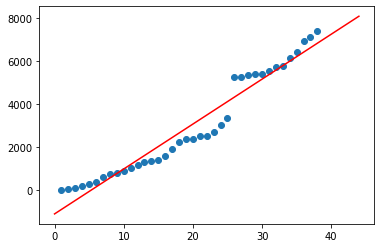

prediccion lineal para los 1 dias despues: 6630.032716927454
prediccion lineal para los 2 dias despues: 6838.631578947369
prediccion lineal para los 3 dias despues: 7047.230440967283
prediccion lineal para los 4 dias despues: 7255.829302987198
prediccion lineal para los 5 dias despues: 7464.428165007113
prediccion lineal para los 6 dias despues: 7673.027027027027
prediccion lineal para los 7 dias despues: 7881.625889046942
[-1088.12517781  -879.52631579  -670.92745377  -462.32859175
  -253.72972973   -45.13086771   163.46799431   372.06685633
   580.66571835   789.26458037   997.86344239  1206.46230441
  1415.06116643  1623.66002845  1832.25889047  2040.85775249
  2249.45661451  2458.05547653  2666.65433855  2875.25320057
  3083.85206259  3292.45092461  3501.04978663  3709.64864865
  3918.24751067  4126.84637269  4335.44523471  4544.04409673
  4752.64295875  4961.24182077  5169.84068279  5378.43954481
  5587.03840683  5795.63726885  6004.23613087  6212.83499289
  6421.43385491  6630.03

In [14]:
regr = linear_model.LinearRegression()
regr.fit(np.array(x).reshape(-1, 1) ,y)


y_prediccion = regr.predict([[46]]) 
 
plt.scatter(x, y)
x_real = np.array(range(0, 45)) 
ypred = regr.predict(x_real.reshape(-1, 1))
plt.plot(x_real, ypred, color='red')
plt.show()

print("prediccion lineal para los 1 dias despues: "+str(ypred[len(ypred)-8]))
print("prediccion lineal para los 2 dias despues: "+str(ypred[len(ypred)-7]))
print("prediccion lineal para los 3 dias despues: "+str(ypred[len(ypred)-6]))
print("prediccion lineal para los 4 dias despues: "+str(ypred[len(ypred)-5]))
print("prediccion lineal para los 5 dias despues: "+str(ypred[len(ypred)-4]))
print("prediccion lineal para los 6 dias despues: "+str(ypred[len(ypred)-3]))
print("prediccion lineal para los 7 dias despues: "+str(ypred[len(ypred)-2]))
print(ypred)
 

>**Logistico**

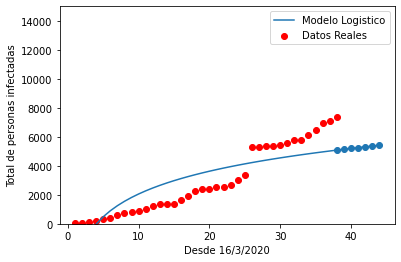

prediccion logistico para 1 dias despues: 5082.625086098429
prediccion logistico para 2 dias despues: 5141.498372986909
prediccion logistico para 3 dias despues: 5198.881035613755
prediccion logistico para 4 dias despues: 5254.846696563864
prediccion logistico para 5 dias despues: 5309.463655237865
prediccion logistico para 6 dias despues: 5362.795388979146
prediccion logistico para 7 dias despues: 5414.900996583889


In [18]:

def logistic_model(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(logistic_model,x,y) #Extraemos los valores de los paramatros


pred_x = list(range(min(x),max(x)+7))  
.scatter(x,y,label="Datos Reales",color="red")
predictf = [logistic_model(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x]
onlypredict = [predictf[len(predictf)-7], predictf[len(predictf)-6], predictf[len(predictf)-5], predictf[len(predictf)-4], predictf[len(predictf)-3], predictf[len(predictf)-2], predictf[len(predictf)-1]]
plt.scatter(range(len(x),len(x)+7),onlypredict)
plt.plot(pred_x, predictf, label="Modelo Logistico" )
plt.xlabel("Desde "+start_date)
plt.ylabel("Total de personas infectadas")
plt.ylim(0,15000)
plt.legend()

plt.show()

print("prediccion logistico para 1 dias despues: "+str(predictf[len(predictf)-7]))
print("prediccion logistico para 2 dias despues: "+str( predictf[len(predictf)-6] ))
print("prediccion logistico para 3 dias despues: "+str( predictf[len(predictf)-5] ))
print("prediccion logistico para 4 dias despues: "+str( predictf[len(predictf)-4] ))
print("prediccion logistico para 5 dias despues: "+str( predictf[len(predictf)-3] ))
print("prediccion logistico para 6 dias despues: "+str( predictf[len(predictf)-2] ))
print("prediccion logistico para 7 dias despues: "+str( predictf[len(predictf)-1] ))




>**Exponencial**

(array([2.14119921e+03, 2.69404780e-01]), array([[ 8.35631443e+04, -4.62897519e-01],
       [-4.62897519e-01,  1.43493961e-05]]))


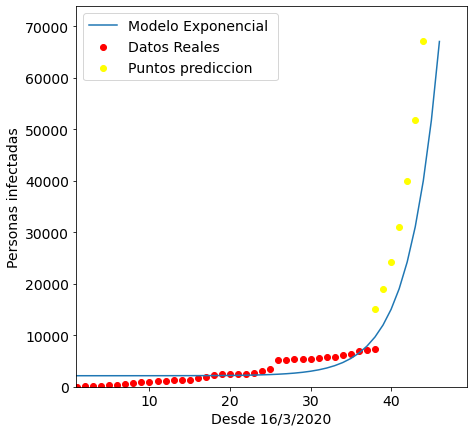

La predicción dentro de 1 días es:  15037.0
La predicción dentro de 2 días es:  19024.0
La predicción dentro de 3 días es:  24244.0
La predicción dentro de 4 días es:  31078.0
La predicción dentro de 5 días es:  40025.0
La predicción dentro de 6 días es:  51738.0
La predicción dentro de 7 días es:  67072.0


In [19]:
def exponencial_model(x,a,b):
    return a+b*np.exp(x*b) 

exp_fit = curve_fit(exponencial_model,x,y)
print(exp_fit)


pred_x = list(range(0,max(x)+9))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)

plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
puntosreales = [exponencial_model(i,exp_fit[0][0],exp_fit[0][1]) for i in list(range(0,max(x)))]

puntosprediccion = [exponencial_model(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x]
predi = [round(puntosprediccion[x[len(x)-1]+2]),round(puntosprediccion[x[len(x)-1]+3]),round(puntosprediccion[x[len(x)-1]+4]),round(puntosprediccion[x[len(x)-1]+5]),round(puntosprediccion[x[len(x)-1]+6]),round(puntosprediccion[x[len(x)-1]+7]),round(puntosprediccion[x[len(x)-1]+8])]


 
plt.plot(pred_x, puntosprediccion, label="Modelo Exponencial " )
plt.scatter(range(max(x),max(x)+7),predi,label="Puntos prediccion",color="yellow")
plt.legend()
#plt.plot(x[len(x)-1],puntos[x[len(x)-1]], 'bo') #grafica punto prediccion
plt.xlabel("Desde "+start_date)
plt.ylabel("Personas infectadas")
plt.ylim((-10,max(y)*10))
plt.xlim((min(x)*0.9,max(x)*1.3))
plt.show()

print("La predicción dentro de 1 días es: ",round(puntosprediccion[x[len(x)-1]+2]))
print("La predicción dentro de 2 días es: ",round(puntosprediccion[x[len(x)-1]+3]))
print("La predicción dentro de 3 días es: ",round(puntosprediccion[x[len(x)-1]+4]))
print("La predicción dentro de 4 días es: ",round(puntosprediccion[x[len(x)-1]+5]))
print("La predicción dentro de 5 días es: ",round(puntosprediccion[x[len(x)-1]+6]))
print("La predicción dentro de 6 días es: ",round(puntosprediccion[x[len(x)-1]+7]))
print("La predicción dentro de 7 días es: ",round(puntosprediccion[x[len(x)-1]+8]))



>**Polinomial**

prediccion polinomial para 1 dias despues: 8324.618041930546
prediccion polinomial para 2 dias despues: 9494.21646130347
prediccion polinomial para 3 dias despues: 11163.254659044847
prediccion polinomial para 4 dias despues: 13483.870988735755
prediccion polinomial para 5 dias despues: 16635.589626156085
prediccion polinomial para 6 dias despues: 20828.09284544672
prediccion polinomial para 7 dias despues: 26304.117013621435


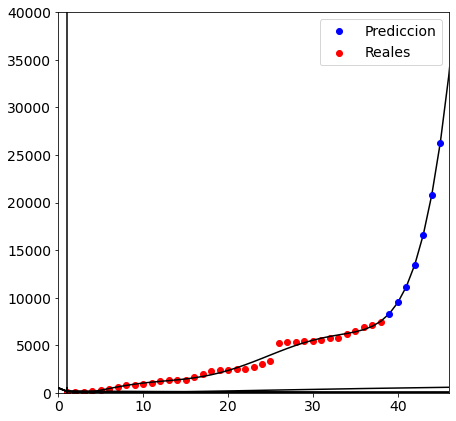

In [20]:
 

pf = PolynomialFeatures(degree = 6)    #polinomio de grado 4
X = pf.fit_transform(np.array(x).reshape(-1, 1))

regresion_lineal = LinearRegression()

regresion_lineal.fit(X, y) 

 

pred_x = list(range(0,max(x)+45))

fil = pf.fit_transform(np.array(pred_x).reshape(-1, 1))

fpredictpol = regresion_lineal.predict(fil)
onlypredicty = [fpredictpol[max(x)+1], fpredictpol[max(x)+2] ,fpredictpol[max(x)+3] ,fpredictpol[max(x)+4], fpredictpol[max(x)+5],fpredictpol[max(x)+6],fpredictpol[max(x)+7] ]
xpredict = range(max(x)+1,max(x)+8)
plotpol.plot(fil, fpredictpol, color='black')
plotpol.scatter(x,y,label="Reales",color="red")
plotpol.plot(xpredict,onlypredicty, 'ob',label="Prediccion")
plotpol.ylim((0,40000))
plotpol.xlim(0,46) 
plotpol.legend()
#plotpol.show()


print("prediccion polinomial para 1 dias despues: "+str(onlypredicty[0]))
print("prediccion polinomial para 2 dias despues: "+str( onlypredicty[1] ))
print("prediccion polinomial para 3 dias despues: "+str( onlypredicty[2] ))
print("prediccion polinomial para 4 dias despues: "+str( onlypredicty[3] ))
print("prediccion polinomial para 5 dias despues: "+str( onlypredicty[4] ))
print("prediccion polinomial para 6 dias despues: "+str( onlypredicty[5] ))
print("prediccion polinomial para 7 dias despues: "+str( onlypredicty[6] ))



▪	Calcular y generar el modelo SIR, con este dato obtener el beta y gamma, para ello solo emplear los datos de casos confirmados. Para ello se debe tomar la tasa de repoduccion efectiva que se calcula como
	> Re = R0*N (Poblacion total tomada la simulacion)

Start time: 2020-04-22 21:27:08.771864
Beta: 0.0000325818 
Gamma: 0.0000000100 


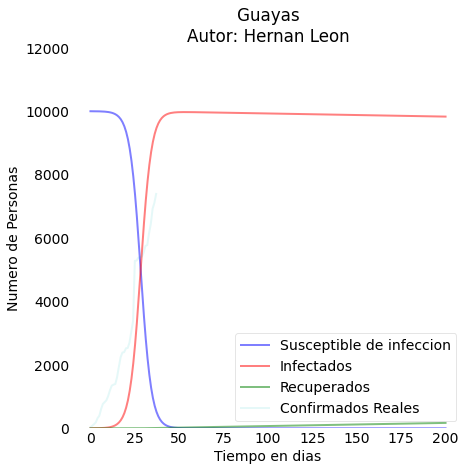

RE= a partir de R0==
3.2581801779978403

Elapsed time: 0.0252510985 seconds.


In [27]:
start_time = time()
print("Start time: "+str(datetime.now()))

def fx(point, data):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [S0,I0,R0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - data)**2))


data = (confirmados)
 
# Total de la poblacion
N = 10000
# Numero Inicial de Infectados
I0 = x[0]
# Numero de Recuperados
R0 = 0
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0







fxmin = minimize(fx, [0.001, 0.001], args=(data), method='L-BFGS-B', bounds=[(0.00000001, 0.4), (0.00000001, 0.4)])

beta, gamma = fxmin.x

print("Beta: %0.10f " % beta)
print("Gamma: %0.10f " % gamma)
Ro = (beta/gamma)/N*10
beta *= N
gamma *= N
# Tasa de contacto, beta (nivel de repoductividad del virus) 
# La tasa de recuperación media, gamma,(1/días) Una persona se recupera en 15 dias.
#beta, gamma = 0.589,0.045
# Una cuadrícula de puntos de tiempo (en días)
t = np.linspace(0, 200, 200)

# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = S0, I0, R0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # Obtenicion de resultados


#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plotsir.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible de infeccion')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.plot(range(len(confirmados)), confirmados, 'c', alpha=0.1, lw=2, label='Confirmados Reales') 
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_ylim(0,N*1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
elapsed_time = (time() - start_time)/60
plotsir.title("Guayas\nAutor: Hernan Leon")
plotsir.show()
 

print("RE= a partir de R0==")
print(Ro)
print("")

print("Elapsed time: %0.10f seconds." % elapsed_time)



▪	Obtener el R0 para generar una simulacion de epidimiologica y su grado de difusion, para ello obtener el numero de muertos, recuperados e infectados.

In [31]:
 
#Parametros de inicio
PROBA_MUERTE = 8.4  # Probabilidad de que la gente muera COVID
CONTAGION_RATE = Ro#71.567543 2.741 0.000319163744392  # Factor R0 para la simulacion COVID probabilidad
PROBA_INFECT = CONTAGION_RATE * 10
PROBA_VACU = 0 # Probabilidad de que exista una vacuna, COVID = 0
SIMULACION_SPEED = 50 # Tiempo de un dia en milisegundos (Cada 25 es un dia)
nb_rows = 100#223 #Numero de filas
nb_cols = 100#223 #Numero de columnas

global display, myfont, states, states_temp #Declaracion de variables globales

#Declaro colores en formato RGB
WHITE = (255, 255, 255) 
BLUE = (0, 0, 255)
GREEN = (0, 247, 0)
BLACK = (0, 0, 0)

#Obtiene los vecinos dado un punto x,y
def get_vecinos(x, y):
    incx = randrange(3)
    incy = randrange(3)
    incx = (incx * 1) - 1
    incy = (incy * 1) - 1
    x2 = x + incx
    y2 = y + incy
    #Validar limites
    if x2 < 0:
        x2 = 0
    if x2 >= nb_cols:
        x2 = nb_cols - 1
    if y2 < 0:
        y2 = 0
    if y2 >= nb_rows:
        y2 = nb_rows - 1
    return [x2, y2] # Nuevos contagiados

#Genero las personas que cuentan con inmunidad o vacuna 
def vacunar():
    for x in range(nb_cols):
        for y in range(nb_rows):
            if randrange(99) < PROBA_VACU:
                states[x][y] = 1

#Funcion que permite contar el numero de muertosde la matriz states == -1
def contar_muertes():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == -1:
                contador +=  1
    return contador

def contar_recuperados():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 1:
                contador +=  1
    return contador

def contar_suceptibles():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] >=10 and states[x][y] <=20:
                contador +=  1
    return contador

#Definimos datos de inicio
states = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = states.copy()
states[randrange(50)][randrange(50)] = 10 # Estado inicial de la simulacion Posicion del Infectado
it = 0 # Variable para contar las Iteraciones
total_muerte = 0 # Contabiliza el numero de muertos
total_recuperados = 0 # Contabiliza el numero de recuperados
total_suceptibles = 0 # Contabiliza el numero de suceptibles
vacunar() #Llamar a la funcion vacunar(por ahora no es necesario)

pygame.init() #Incializo el motor de juegos pygame
pygame.font.init() #Inicializo el tipo de letra
display=pygame.display.set_mode((1280,900),0,32) #Tamanio de la ventana
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")# Titulo
font=pygame.font.SysFont('Calibri', 100) # Tipo de letra
display.fill(WHITE) # Color de fondo

while True:
    pygame.time.delay(SIMULACION_SPEED) # Sleep o pausa
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy() #Copia de la matriz
        #Recorrera la matriz
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10: # Numero de dias de contagio
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE: # Genero un randomico para verificar si fallece o se recupera
                        states_temp[x][y] = -1 # Muere
                    else:
                        states_temp[x][y] = 1 # Cura o recupera
                if state >= 10 and state <= 20: # Rango de infectado
                    if randrange(99) < PROBA_INFECT: # Infecto a las personas cercanas entre  10 y 20 
                        neighbour = get_vecinos(x, y) #Obtenemos los vecinos a contagiar
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0: #Verifico que este sano
                            states_temp[x2][y2] = 10 # Contagia
        states = states_temp.copy()
        total_muerte = contar_muertes() # contar el numero de muertos 
        total_recuperados = contar_recuperados() # contar el numero de recuperados
        total_suceptibles = contar_suceptibles() # contar el numero de suceptibles
        
        
    pygame.draw.rect(display, WHITE, (250, 30, 260, 50)) # Grafico el fondo
    textsurface = font.render("Total muertes: "+ str(total_muerte), False, (255,160,122)) #El numero de muertos
    print("Total muertes: "+ str(total_muerte)) 
    print("Total recuperados: "+ str(total_recuperados))
    print("Total suceptibles: "+ str(total_suceptibles))
    display.blit(textsurface, (0, 5)) # Graficar el texto de muertes
    #Graficar el estado del paciente matriz
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE # No infectado
            if states[x][y] == 1:
                color = GREEN # Recupero
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50) # Injectado - Rojo
            if states[x][y] == -1:
                color = BLACK # Muerto
            pygame.draw.circle(display, color, (50 + x * 5 + 5, 20+ y * 5 + 5), 2 )
            pygame.draw.rect(display, WHITE, (20 + x * 12 + 3, 20+ y * 12 + 4, 1, 1))
            #pygame.draw.circle(display, color, (100 + x * 12 + 5, 100 + y * 12 + 5), 5)
            #pygame.draw.rect(display, WHITE, (100 + x * 12 + 3, 100 + y * 12 + 4, 1, 1))
    #Escuachar los eventos del teclado
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE: #Presiona y Escape
            pygame.quit() #Termino simulacion
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE: #Presiona y espacio
            #Reiniciamos valores
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[5][5] = 10
            it = 0
            total_muerte = 0
            vacunar() #Llamar a la funcion vacunar
            
    pygame.display.update()# Mandar actualizar la ventana

Total muertes: 0
Total recuperados: 0
Total suceptibles: 0
Total muertes: 0
Total recuperados: 0
Total suceptibles: 4
Total muertes: 0
Total recuperados: 0
Total suceptibles: 4
Total muertes: 0
Total recuperados: 0
Total suceptibles: 4
Total muertes: 0
Total recuperados: 0
Total suceptibles: 6
Total muertes: 0
Total recuperados: 0
Total suceptibles: 7
Total muertes: 0
Total recuperados: 0
Total suceptibles: 7
Total muertes: 0
Total recuperados: 0
Total suceptibles: 7
Total muertes: 0
Total recuperados: 0
Total suceptibles: 11
Total muertes: 0
Total recuperados: 0
Total suceptibles: 11
Total muertes: 0
Total recuperados: 0
Total suceptibles: 15
Total muertes: 1
Total recuperados: 3
Total suceptibles: 14
Total muertes: 1
Total recuperados: 3
Total suceptibles: 16
Total muertes: 1
Total recuperados: 3
Total suceptibles: 17
Total muertes: 1
Total recuperados: 5
Total suceptibles: 20
Total muertes: 1
Total recuperados: 6
Total suceptibles: 21
Total muertes: 1
Total recuperados: 6
Total suce

Total muertes: 161
Total recuperados: 1414
Total suceptibles: 213
Total muertes: 161
Total recuperados: 1437
Total suceptibles: 213
Total muertes: 161
Total recuperados: 1449
Total suceptibles: 218
Total muertes: 163
Total recuperados: 1472
Total suceptibles: 214
Total muertes: 165
Total recuperados: 1498
Total suceptibles: 199
Total muertes: 167
Total recuperados: 1517
Total suceptibles: 200
Total muertes: 170
Total recuperados: 1530
Total suceptibles: 215
Total muertes: 172
Total recuperados: 1546
Total suceptibles: 224
Total muertes: 174
Total recuperados: 1564
Total suceptibles: 227
Total muertes: 176
Total recuperados: 1583
Total suceptibles: 234
Total muertes: 180
Total recuperados: 1601
Total suceptibles: 240
Total muertes: 183
Total recuperados: 1618
Total suceptibles: 243
Total muertes: 185
Total recuperados: 1637
Total suceptibles: 238
Total muertes: 188
Total recuperados: 1654
Total suceptibles: 243
Total muertes: 190
Total recuperados: 1669
Total suceptibles: 257
Total muer

Total muertes: 550
Total recuperados: 5289
Total suceptibles: 435
Total muertes: 552
Total recuperados: 5334
Total suceptibles: 440
Total muertes: 556
Total recuperados: 5370
Total suceptibles: 446
Total muertes: 560
Total recuperados: 5405
Total suceptibles: 444
Total muertes: 564
Total recuperados: 5432
Total suceptibles: 446
Total muertes: 568
Total recuperados: 5468
Total suceptibles: 442
Total muertes: 574
Total recuperados: 5512
Total suceptibles: 424
Total muertes: 576
Total recuperados: 5557
Total suceptibles: 408
Total muertes: 577
Total recuperados: 5591
Total suceptibles: 412
Total muertes: 582
Total recuperados: 5638
Total suceptibles: 393
Total muertes: 588
Total recuperados: 5670
Total suceptibles: 390
Total muertes: 592
Total recuperados: 5710
Total suceptibles: 377
Total muertes: 595
Total recuperados: 5761
Total suceptibles: 359
Total muertes: 597
Total recuperados: 5794
Total suceptibles: 361
Total muertes: 598
Total recuperados: 5831
Total suceptibles: 354
Total muer

Total muertes: 866
Total recuperados: 8546
Total suceptibles: 37
Total muertes: 867
Total recuperados: 8551
Total suceptibles: 33
Total muertes: 867
Total recuperados: 8561
Total suceptibles: 27
Total muertes: 867
Total recuperados: 8565
Total suceptibles: 25
Total muertes: 868
Total recuperados: 8569
Total suceptibles: 21
Total muertes: 868
Total recuperados: 8571
Total suceptibles: 20
Total muertes: 868
Total recuperados: 8573
Total suceptibles: 19
Total muertes: 868
Total recuperados: 8576
Total suceptibles: 16
Total muertes: 868
Total recuperados: 8577
Total suceptibles: 18
Total muertes: 868
Total recuperados: 8578
Total suceptibles: 18
Total muertes: 869
Total recuperados: 8580
Total suceptibles: 15
Total muertes: 869
Total recuperados: 8581
Total suceptibles: 16
Total muertes: 870
Total recuperados: 8582
Total suceptibles: 15
Total muertes: 870
Total recuperados: 8586
Total suceptibles: 13
Total muertes: 870
Total recuperados: 8587
Total suceptibles: 14
Total muertes: 870
Total 

Total muertes: 873
Total recuperados: 8602
Total suceptibles: 0
Total muertes: 873
Total recuperados: 8602
Total suceptibles: 0
Total muertes: 873
Total recuperados: 8602
Total suceptibles: 0
Total muertes: 873
Total recuperados: 8602
Total suceptibles: 0
Total muertes: 873
Total recuperados: 8602
Total suceptibles: 0
Total muertes: 873
Total recuperados: 8602
Total suceptibles: 0
Total muertes: 873
Total recuperados: 8602
Total suceptibles: 0
Total muertes: 873
Total recuperados: 8602
Total suceptibles: 0
Total muertes: 873
Total recuperados: 8602
Total suceptibles: 0
Total muertes: 873
Total recuperados: 8602
Total suceptibles: 0
Total muertes: 873
Total recuperados: 8602
Total suceptibles: 0
Total muertes: 873
Total recuperados: 8602
Total suceptibles: 0
Total muertes: 873
Total recuperados: 8602
Total suceptibles: 0
Total muertes: 873
Total recuperados: 8602
Total suceptibles: 0
Total muertes: 873
Total recuperados: 8602
Total suceptibles: 0
Total muertes: 873
Total recuperados: 86

error: video system not initialized

<img src ="resultado.png" />

▪	Finalmente, contrarestar los modelos matematicos y probavilisticos y generar las siguientes conclusiones
•	Cual tiene una mejor prediccion
•	Ventajas y desventajas de los modelos.


>>La Mejor Prediccion la tiene el modelo polinomial, debido a que se ajusta al comportamiento de los datos obtenidos

### Ventajas y Desventajas de los modelos
#### Lineal
#### Ventajas
>>Fácil de entender y explicar, lo que puede ser muy valioso para las decisiones de negocios.
>>Es rápido de modelar y es particularmente útil cuando la relación a modelar no es extremadamente compleja y no tiene mucha información.
>>Es menos propenso al sobreajuste.
#### Desventajas

>>No se puede modelar relaciones complejas.
>>No se pueden capturar relaciones no lineales sin transformar la entrada, por lo que tienes que trabajar duro >>para que se ajuste a funciones no lineales.
Puede sufrir con valores atípicos.

### Logistico
#### Ventajas
>>Es muy usada por su simplicidad y eficacia
>>Es mejor cuando se usan atributos acorde a su salida
#### Desventajas

>>Imposibilidad de resolver directamente problemas no lineales.
>>No se ajusta correctamente a los datos

### Exponencial
#### Ventajas
>>Es muy usada para predecir la evolucion de un virus. 
#### Desventajas

>>Se aleja de los datos conforme pasa el tiempo

### Polinomial
#### Ventajas
>>Es el que mejor se ajusta a los datos obtenidos. 
#### Desventajas

>>Conforma aumenta el grado de prediccion y el numero de datos se hace mas complejo su calculo.


